Path to dataset files: /root/.cache/kagglehub/datasets/uom190346a/sleep-health-and-lifestyle-dataset/versions/2
Archivos en la carpeta: ['Sleep_health_and_lifestyle_dataset.csv']
Cargando: /root/.cache/kagglehub/datasets/uom190346a/sleep-health-and-lifestyle-dataset/versions/2/Sleep_health_and_lifestyle_dataset.csv


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


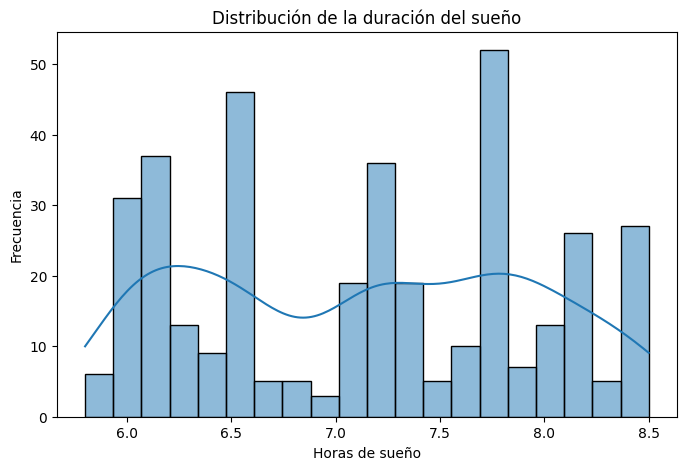

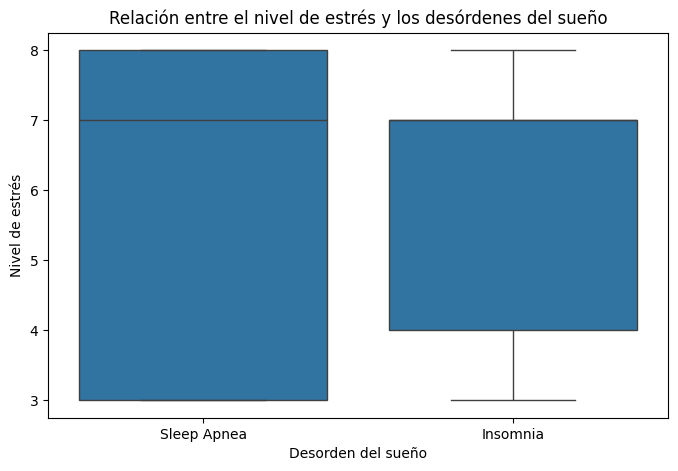

                  Stress Level  Quality of Sleep
Stress Level          1.000000         -0.898752
Quality of Sleep     -0.898752          1.000000


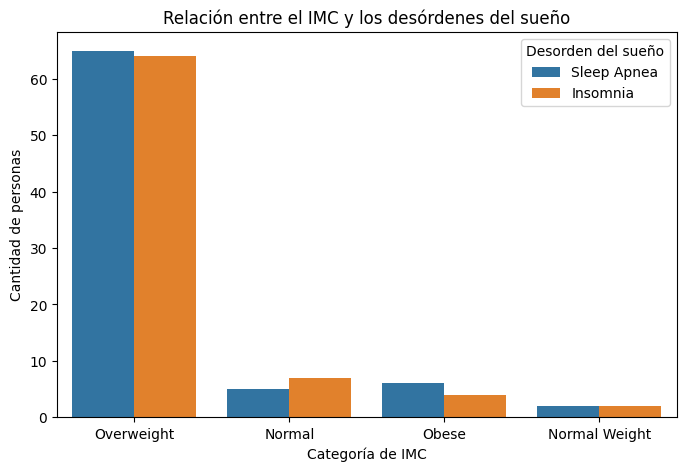

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64
BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64


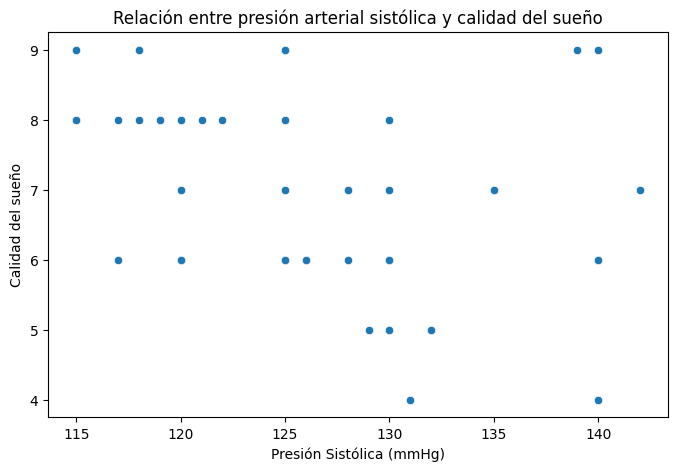

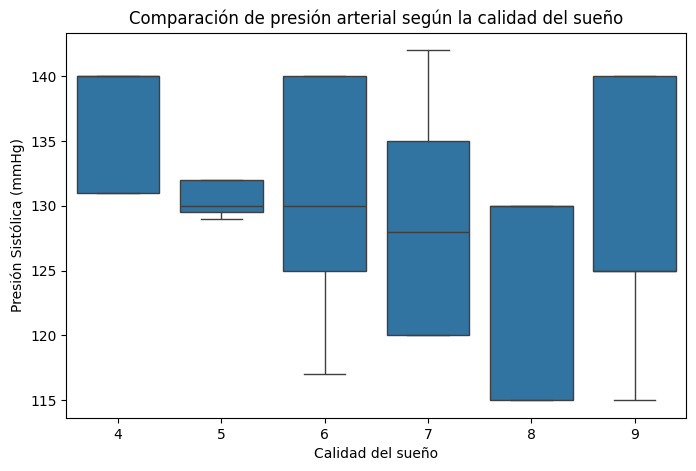

                  Systolic  Quality of Sleep
Systolic          1.000000         -0.121632
Quality of Sleep -0.121632          1.000000


In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")

print("Path to dataset files:", path)

import pandas as pd
import os

# Verificar la ruta de los archivos descargados
print("Archivos en la carpeta:", os.listdir(path))

# Buscar el archivo CSV dentro de la carpeta
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

if csv_files:
    dataset_path = os.path.join(path, csv_files[0])  # Tomar el primer archivo CSV encontrado
    print("Cargando:", dataset_path)

    # Cargar el dataset con Pandas
    df = pd.read_csv(dataset_path)

    # Mostrar las primeras filas
    display(df.head())
else:
    print("No se encontró ningún archivo CSV en la carpeta.")

    df.info()  # Muestra tipos de datos y valores nulos
df.describe()  # Muestra estadísticas básicas (promedio, mínimos, máximos, etc.)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["Sleep Duration"], bins=20, kde=True)
plt.title("Distribución de la duración del sueño")
plt.xlabel("Horas de sueño")
plt.ylabel("Frecuencia")
plt.show()

# Contar cuántas personas tienen apnea del sueño por ocupación
df.groupby(["Occupation", "Sleep Disorder"])["Person ID"].count().unstack().fillna(0)

# Ver cuántas personas en cada ocupación tienen apnea del sueño
df.groupby(["Occupation", "Sleep Disorder"])["Person ID"].count().unstack().fillna(0)

# Gráfico: ¿Las personas con más estrés tienen más apnea del sueño?
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x="Sleep Disorder", y="Stress Level", data=df)
plt.title("Relación entre el nivel de estrés y los desórdenes del sueño")
plt.xlabel("Desorden del sueño")
plt.ylabel("Nivel de estrés")
plt.show()
# Ver la correlación entre nivel de estrés y calidad del sueño
correlacion_estres_sueno = df[["Stress Level", "Quality of Sleep"]].corr()
print(correlacion_estres_sueno)

# Gráfico: ¿El sobrepeso influye en la apnea del sueño?
plt.figure(figsize=(8,5))
sns.countplot(x="BMI Category", hue="Sleep Disorder", data=df)
plt.title("Relación entre el IMC y los desórdenes del sueño")
plt.xlabel("Categoría de IMC")
plt.ylabel("Cantidad de personas")
plt.legend(title="Desorden del sueño")
plt.show()
# Ver todas las categorías únicas de IMC nuevamente
print(df["BMI Category"].value_counts())

# Reemplazar manualmente si hay valores duplicados
df["BMI Category"] = df["BMI Category"].replace({
    "Normal ": "Normal",  # Corrige si hay espacios extra
    "normal": "Normal",   # Corrige si hay diferencias de mayúsculas/minúsculas
    "Overweight ": "Overweight",
    "Obese ": "Obese"
})

# Verificar nuevamente
print(df["BMI Category"].value_counts())

# Unificar categorías similares
df["BMI Category"] = df["BMI Category"].replace({
    "Normal Weight": "Normal"
})

# Verificar si se arregló
print(df["BMI Category"].value_counts())


# Separar la presión arterial en dos columnas: Sistólica y Diastólica
df[["Systolic", "Diastolic"]] = df["Blood Pressure"].str.split("/", expand=True).astype(float)

# Verificar si se hizo correctamente
df[["Blood Pressure", "Systolic", "Diastolic"]].head()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Systolic"], y=df["Quality of Sleep"])
plt.title("Relación entre presión arterial sistólica y calidad del sueño")
plt.xlabel("Presión Sistólica (mmHg)")
plt.ylabel("Calidad del sueño")
plt.show()
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Quality of Sleep"], y=df["Systolic"])
plt.title("Comparación de presión arterial según la calidad del sueño")
plt.xlabel("Calidad del sueño")
plt.ylabel("Presión Sistólica (mmHg)")
plt.show()
# Ver la correlación entre presión arterial y calidad del sueño
correlacion = df[["Systolic", "Quality of Sleep"]].corr()
print(correlacion)




# 📊 Análisis de Datos sobre Sueño y Salud
Este notebook analiza la relación entre calidad del sueño, nivel de estrés, presión arterial e IMC.
---
## 📌 1. Carga y exploración de datos
Aquí cargamos el dataset y exploramos sus primeras filas.
# 📌 Conclusiones  
1. **El nivel de estrés tiene una correlación negativa fuerte (-0.89) con la calidad del sueño.**  
   - A mayor estrés, peor calidad del sueño.  
2. **No encontramos una relación fuerte entre la presión arterial y la calidad del sueño.**  
3. **El análisis mostró que el IMC tenía algunas inconsistencias en la clasificación de los datos.**  
